In [1]:
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import re
import matplotlib.pyplot as plt

url='https://indianbloggers.org/'
content = requests.get(url).text

In [2]:
d = {'title':[],'links':[]}
soup = BeautifulSoup(content, "html.parser")

In [16]:
for link in soup.find_all('a',):
    if len(link.text.strip()) > 1 and bool(re.match('^http',link['href'])) and not bool(re.search('indianbloggers|twitter|facebook',link['href'])):
        d['title'].append(link.text)
        d['links'].append(link['href'])
        
blog_list = pd.DataFrame(d).set_index('title')

In [19]:
blog_list.head()
blog_list.to_csv('bloggers.csv')

In [20]:
cat = {'blogspot':0,'wordpress':0,'others':0}

for link in soup.find_all('a',):
    if re.search('blogspot',link['href']):
        cat['blogspot']+=1
    elif re.search('wordpress',link['href']):
        cat['wordpress']+=1
    else:
        cat['others']+=1
    
print(cat)

{'blogspot': 107, 'wordpress': 49, 'others': 245}


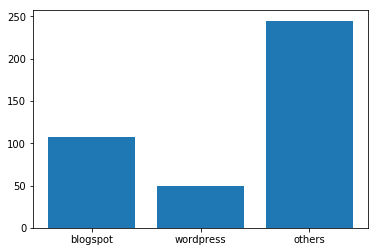

In [21]:
plt.bar(range(len(cat)), cat.values())
plt.xticks(range(len(cat)), cat.keys())

plt.show()